In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [28]:
FILE_PATH = 'Dataset/Stroke.csv'
df=pd.read_csv(FILE_PATH)

# Exploratory Data Analysis

In [29]:
df.shape

(5110, 12)

In [30]:
df.columns.values

array(['id', 'gender', 'age', 'hypertension', 'heart_disease',
       'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level',
       'bmi', 'smoking_status', 'stroke'], dtype=object)

In [31]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [32]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [33]:
df.describe(include='object')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [35]:
df.nunique(axis=0)

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [36]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [37]:
stroke_and_nan = df[(df['stroke'] == 1) & df['bmi'].isna()].shape[0]
print("Rows where stroke=1 and bmi=NaN:", stroke_and_nan)
print("Rows where stroke=1:", df[df['stroke'] == 1].shape[0])

Rows where stroke=1 and bmi=NaN: 40
Rows where stroke=1: 249


In [38]:

average_bmi_stroke_1 = df.loc[(df['stroke'] == 1) & ~df['bmi'].isna(), 'bmi'].mean()
df.loc[(df['stroke'] == 1) & df['bmi'].isna(), 'bmi'] = average_bmi_stroke_1

In [39]:
average_bmi_stroke_2 = df.loc[(df['stroke'] == 0) & ~df['bmi'].isna(), 'bmi'].mean()
df.loc[(df['stroke'] == 0) & df['bmi'].isna(), 'bmi'] = average_bmi_stroke_2

<Axes: >

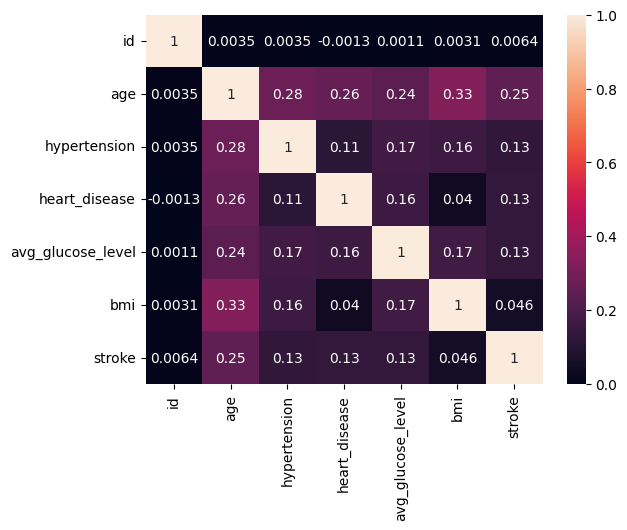

In [40]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

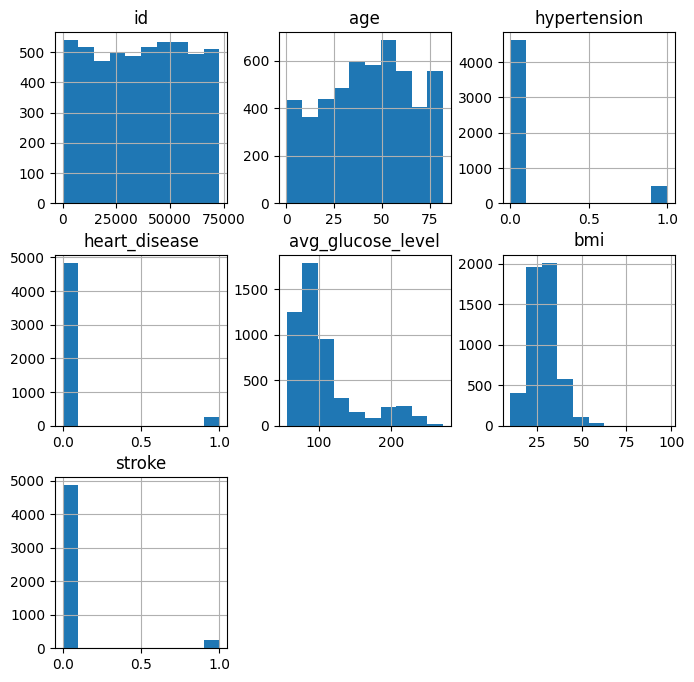

In [41]:
df.hist(figsize=(8,8))
plt.title('Histograms of Features')
plt.show()

# Logistic Regression

In [42]:
x = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [43]:
ct = ColumnTransformer([('encoder', OneHotEncoder(), [0, 4, 5, 6, 9])], remainder='passthrough')
x = ct.fit_transform(x)

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=50)

In [45]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [46]:
logistic_classifier = LogisticRegression(random_state=0)
logistic_classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [47]:
print("Logistic Regression Accuracy: {:.2f}%".format(logistic_classifier.score(x_test, y_test)*100))

Logistic Regression Accuracy: 95.30%


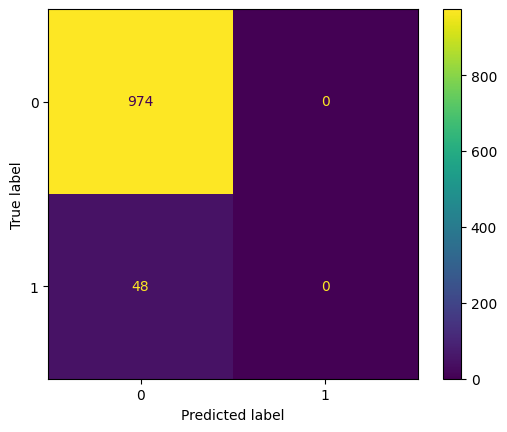

In [48]:
from sklearn.metrics import confusion_matrix

y_pred = logistic_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred, labels=logistic_classifier.classes_)
ConfusionMatrixDisplay(cm, display_labels=logistic_classifier.classes_).plot()

In [49]:
y_pred_prob = logistic_classifier.predict_proba(x_test)
for threshold in np.arange(0.1, 0.51, 0.1):
    y_pred = [1 if  prob[1] >= threshold else 0 for prob in y_pred_prob]
    cm = confusion_matrix(y_test, y_pred)
    accuracy = np.trace(cm) / float(np.sum(cm))
    print('Threshold: {:.2f}'.format(threshold))
    print('Test accuracy: {:.2f}%,'.format(accuracy*100), end=' ')
    print('TPR: {:.2f}%,'.format(cm[1,1]/(cm[1,0]+cm[1,1])*100), end=' ')
    print('FPR: {:.2f}%'.format(cm[0,1]/(cm[0,0]+cm[0,1])*100))
    print('Confusion Matrix')
    print(cm, end='\n\n')
    

Threshold: 0.10
Test accuracy: 84.83%, TPR: 58.33%, FPR: 13.86%
Confusion Matrix
[[839 135]
 [ 20  28]]

Threshold: 0.20
Test accuracy: 92.27%, TPR: 18.75%, FPR: 4.11%
Confusion Matrix
[[934  40]
 [ 39   9]]

Threshold: 0.30
Test accuracy: 94.42%, TPR: 10.42%, FPR: 1.44%
Confusion Matrix
[[960  14]
 [ 43   5]]

Threshold: 0.40
Test accuracy: 95.30%, TPR: 2.08%, FPR: 0.10%
Confusion Matrix
[[973   1]
 [ 47   1]]

Threshold: 0.50
Test accuracy: 95.30%, TPR: 0.00%, FPR: 0.00%
Confusion Matrix
[[974   0]
 [ 48   0]]



AUC for Logistic Regression: 0.8095910335386721


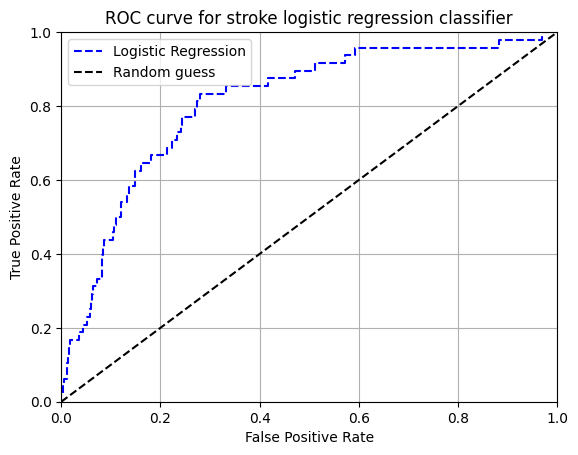

In [50]:
y_pred_prob = logistic_classifier.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1])
plt.plot(fpr, tpr, 'b--', label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.grid(True)
plt.legend()
plt.title('ROC curve for stroke logistic regression classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

print("AUC for Logistic Regression:", roc_auc_score(y_test, y_pred_prob[:, 1]))

## Optimal threshold using Youden J Statistic

In [51]:
y_pred_prob = logistic_classifier.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1])
youden_j = tpr - fpr
best_threshold_index = np.argmax(youden_j)
best_threshold = thresholds[best_threshold_index]

y_pred = [1 if  prob[1] >= best_threshold else 0 for prob in y_pred_prob]
cm = confusion_matrix(y_test, y_pred)
accuracy = np.trace(cm) / float(np.sum(cm))
print('Best threshold: {:.5f}'.format(best_threshold))
print('Test accuracy: {:.2f}%,'.format(accuracy*100))
print('TPR: {:.2f}%,'.format(cm[1,1]/(cm[1,0]+cm[1,1])*100))
print('FPR: {:.2f}%'.format(cm[0,1]/(cm[0,0]+cm[0,1])*100))
print("\nConfusion Matrix\n", cm)

Best threshold: 0.03909
Test accuracy: 72.60%,
TPR: 83.33%,
FPR: 27.93%

Confusion Matrix
 [[702 272]
 [  8  40]]


## Optimal threshold using distance to (0, 1)

In [52]:
y_pred_prob = logistic_classifier.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1])
closest_point = fpr**2 + (1-tpr)**2
best_threshold_index = np.argmin(closest_point)
best_threshold = thresholds[best_threshold_index]

y_pred = [1 if  prob[1] >= best_threshold else 0 for prob in y_pred_prob]
cm = confusion_matrix(y_test, y_pred)
accuracy = np.trace(cm) / float(np.sum(cm))
print('Best threshold: {:.5f}'.format(best_threshold))
print('Test accuracy: {:.2f}%,'.format(accuracy*100))
print('TPR: {:.2f}%,'.format(cm[1,1]/(cm[1,0]+cm[1,1])*100))
print('FPR: {:.2f}%'.format(cm[0,1]/(cm[0,0]+cm[0,1])*100))
print("\nConfusion Matrix\n", cm)

Best threshold: 0.03909
Test accuracy: 72.60%,
TPR: 83.33%,
FPR: 27.93%

Confusion Matrix
 [[702 272]
 [  8  40]]


# KNN with different K

In [53]:
x = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [54]:
ct = ColumnTransformer([('encoder', OneHotEncoder(), [0, 4, 5, 6, 9])], remainder='passthrough')
x = ct.fit_transform(x)

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=15)

In [56]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [57]:
knn = KNeighborsClassifier(n_neighbors=50, metric='minkowski', p=2)
knn.fit(x_train, y_train)
y_pred_prob = knn.predict_proba(x_test)
for threshold in np.arange(0.1, 0.51, 0.1):
    y_pred = [1 if  prob[1] >= threshold else 0 for prob in y_pred_prob]
    cm = confusion_matrix(y_test, y_pred)
    accuracy = np.trace(cm) / float(np.sum(cm))
    print('Threshold: {:.2f}'.format(threshold))
    print('Test accuracy: {:.2f}%,'.format(accuracy*100), end=' ')
    print('TPR: {:.2f}%,'.format(cm[1,1]/(cm[1,0]+cm[1,1])*100), end=' ')
    print('FPR: {:.2f}%'.format(cm[0,1]/(cm[0,0]+cm[0,1])*100))
    print('Confusion Matrix')
    print(cm, end='\n\n')

Threshold: 0.10
Test accuracy: 85.91%, TPR: 34.55%, FPR: 11.17%
Confusion Matrix
[[859 108]
 [ 36  19]]

Threshold: 0.20
Test accuracy: 93.44%, TPR: 3.64%, FPR: 1.45%
Confusion Matrix
[[953  14]
 [ 53   2]]

Threshold: 0.30
Test accuracy: 94.52%, TPR: 0.00%, FPR: 0.10%
Confusion Matrix
[[966   1]
 [ 55   0]]

Threshold: 0.40
Test accuracy: 94.62%, TPR: 0.00%, FPR: 0.00%
Confusion Matrix
[[967   0]
 [ 55   0]]

Threshold: 0.50
Test accuracy: 94.62%, TPR: 0.00%, FPR: 0.00%
Confusion Matrix
[[967   0]
 [ 55   0]]



## Optimal threshold using Youden J Statistic

In [544]:
y_pred_prob = logistic_classifier.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1])
youden_j = tpr - fpr
best_threshold_index = np.argmax(youden_j)
best_threshold = thresholds[best_threshold_index]

y_pred = [1 if  prob[1] >= best_threshold else 0 for prob in y_pred_prob]
cm = confusion_matrix(y_test, y_pred)
accuracy = np.trace(cm) / float(np.sum(cm))
print('Best threshold: {:.5f}'.format(best_threshold))
print('Test accuracy: {:.2f}%,'.format(accuracy*100))
print('TPR: {:.2f}%,'.format(cm[1,1]/(cm[1,0]+cm[1,1])*100))
print('FPR: {:.2f}%'.format(cm[0,1]/(cm[0,0]+cm[0,1])*100))
print("\nConfusion Matrix\n", cm)

Best threshold: 0.03846
Test accuracy: 69.47%,
TPR: 94.55%,
FPR: 31.95%

Confusion Matrix
 [[658 309]
 [  3  52]]


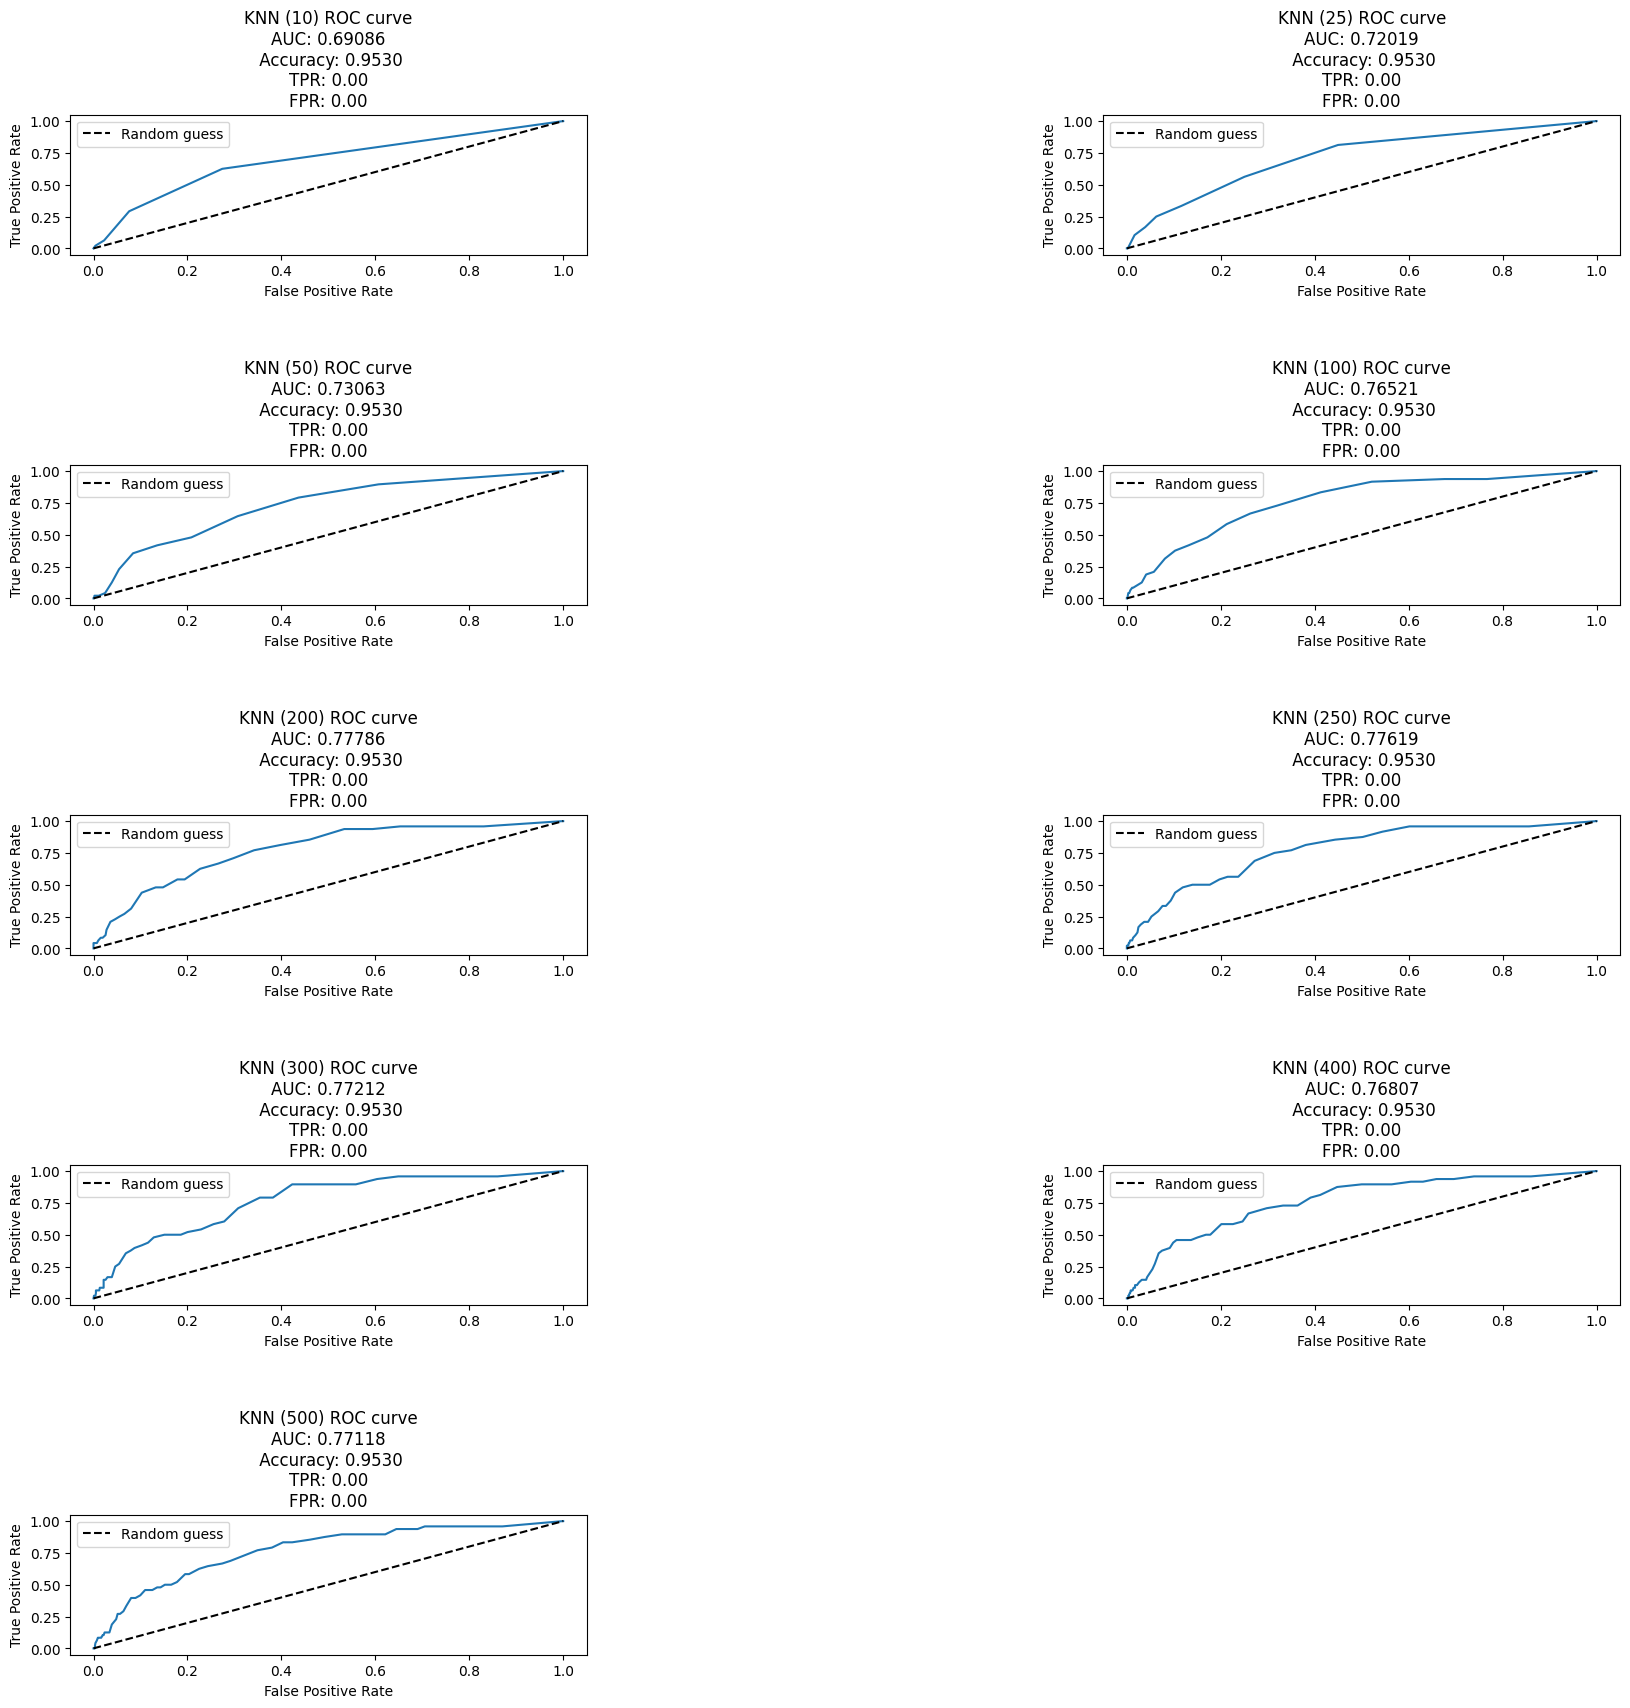

In [420]:
neighbours_list = [10, 25, 50, 100, 200, 250, 300, 400, 500]
tpr_list = []
fpr_list = []
fig = plt.figure(figsize=(20, 20))
gs = GridSpec(nrows=5, ncols=2)

for idx, neighbours in enumerate(neighbours_list):
    knn = KNeighborsClassifier(n_neighbors=neighbours)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    fpr_normal = cm[0,1]/(cm[0,0]+cm[0,1])
    tpr_normal = cm[1,1]/(cm[1,0]+cm[1,1])
    accuracy = knn.score(x_test, y_test)

    y_pred_proba = knn.predict_proba(x_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
    auc = roc_auc_score(y_test, y_pred_proba[:, 1])
    ax = fig.add_subplot(gs[idx//2, idx%2])
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], 'k--', label='Random guess')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'KNN ({neighbours}) ROC curve\nAUC: {auc:.5f}\n Accuracy: {accuracy:.4f}\nTPR: {tpr_normal:.2f}\nFPR: {fpr_normal:.2f}')
    ax.legend()

plt.subplots_adjust(wspace=1, hspace=1.5)  # Adjust the spacing between subplots
plt.show()
print()